# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [4]:
import seaborn as sns
%matplotlib inline
#Load two datasets
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [6]:
#Heatmaps
#In order for heatmaps to work data should already be in a matrix form
#Let's convert tips dataset to matrix form
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


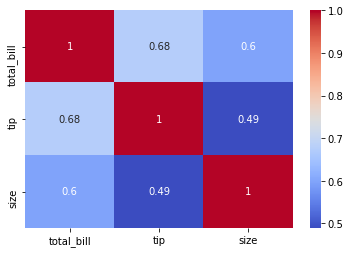

In [7]:
tc=tips.corr()
#Convert correlation matrix to heatmap to easily understand correlation between data
#Setting annot=true (annotations) will show actual correlation numerical values on the heatmap
#You can choose various colormaps by using the cmap (colormap) argument
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [8]:
#Or for the flights data:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [9]:
#Let's convert flights data to a pivot table format, and map it to a heatmap
fp = flights.pivot_table(index='month',columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


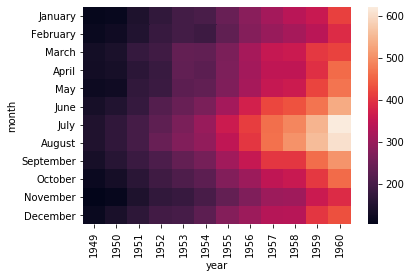

In [10]:
sns.heatmap(fp)

In [11]:
#From the heatmap we see as years went by passenger number increased and it is most in 1960

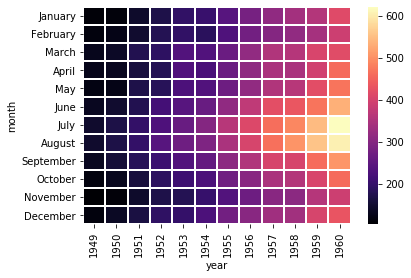

In [12]:
#You can also specify linecolor and linewidth of each boxes in the heatmap for clarity
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

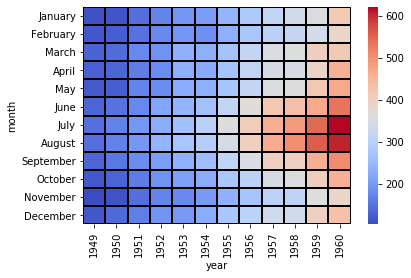

In [13]:
#More formats
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

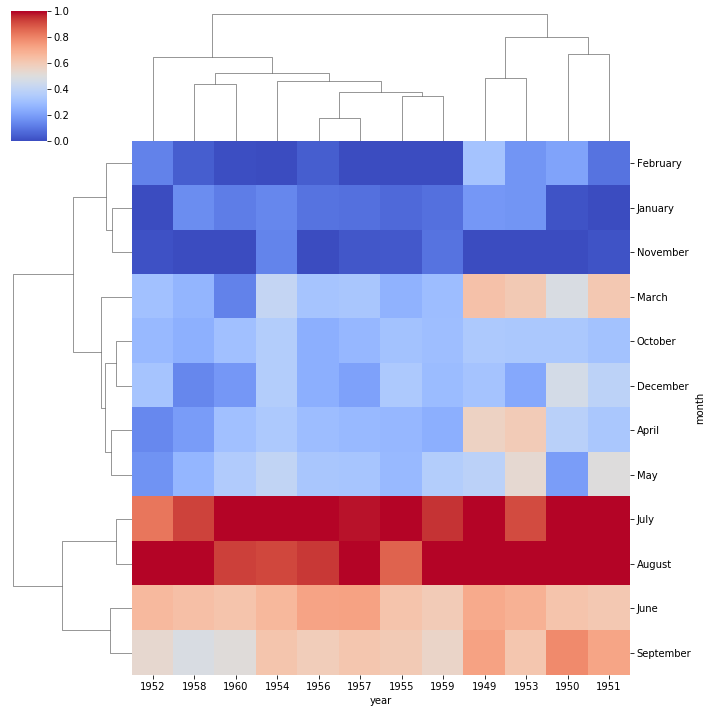

In [23]:
#We've seen heatmap
#Second matrix plot we're gonna see "Cluster Map"
'''
Cluster map is actually going to use hierarchical clustering,
to produce a clustered version of this heat map
'''
'''
Cluster map will cluster the rows and columns together which have more similarity. 
For instance: Here November and March have more similarity that's why,
they have been clustered together.
'''
'''
similarly year 1953 and 1954 have more similarity that's why,
they have been clustered together.
'''
'''
The rows and columns in cluster map are not in order. 
They are in groups/cluster with similar columns and rows.
'''
#You can also standardize values(Here, no of passengers) by adding a parameter standard_scale=1
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

We can see November, January and February are the low passenger months and july,august are the months with most passengers. 
You can see cluster map documentation for more information on cluster map. 
More generally, we will look into ML clustering algorithms to do clustering tasks.